# CARRADA Dataset: Camera and Automotive Radar with Range-Angle-Doppler Annotations

This notebook shows samples of annotated radar data and how to use utils functions

In [9]:
%matplotlib inline
import os
import json
import numpy as np
from IPython.display import Image

from carrada_dataset.utils import CARRADA_HOME
from carrada_dataset.utils.configurable import Configurable
from carrada_dataset.utils.visualize_signal import SignalVisualizer
from carrada_dataset.utils.transform_annotations import AnnotationTransformer
from carrada_dataset.utils.generate_annotations import AnnotationGenerator
from carrada_dataset.utils.transform_data import DataTransformer

In [10]:
# Set path
# %run ./scripts/set_path.py '/datasets/'
os.chdir(CARRADA_HOME)

In [11]:
# Sample to visualize
# seq_name = '2019-09-16-13-20-20'
# instances = ['000670', '000673']
# frame_name = '000100'
seq_name = '2020-02-28-13-09-58'
instances = ['001114', '001115']
frame_name = '000117'

In [12]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rd_path = os.path.join(seq_path, 'range_doppler_numpy', frame_name + '.npy')
ra_path = os.path.join(seq_path, 'range_angle_numpy', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

'''
# Path to the RAD tensor (soon available)
rad_path = os.path.join(seq_path, 'RAD_numpy', frame_name + '.npy')
'''

annotations_path = os.path.join(carrada, 'annotations_frame_oriented.json')

In [13]:
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
'''
# the RA and RD matrices can be computed directly from the RAD tensor
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()
'''
ra_matrix = np.load(ra_path)
rd_matrix = np.load(rd_path)

Camera image of the scene 2020-02-28-13-09-58, frame 000117


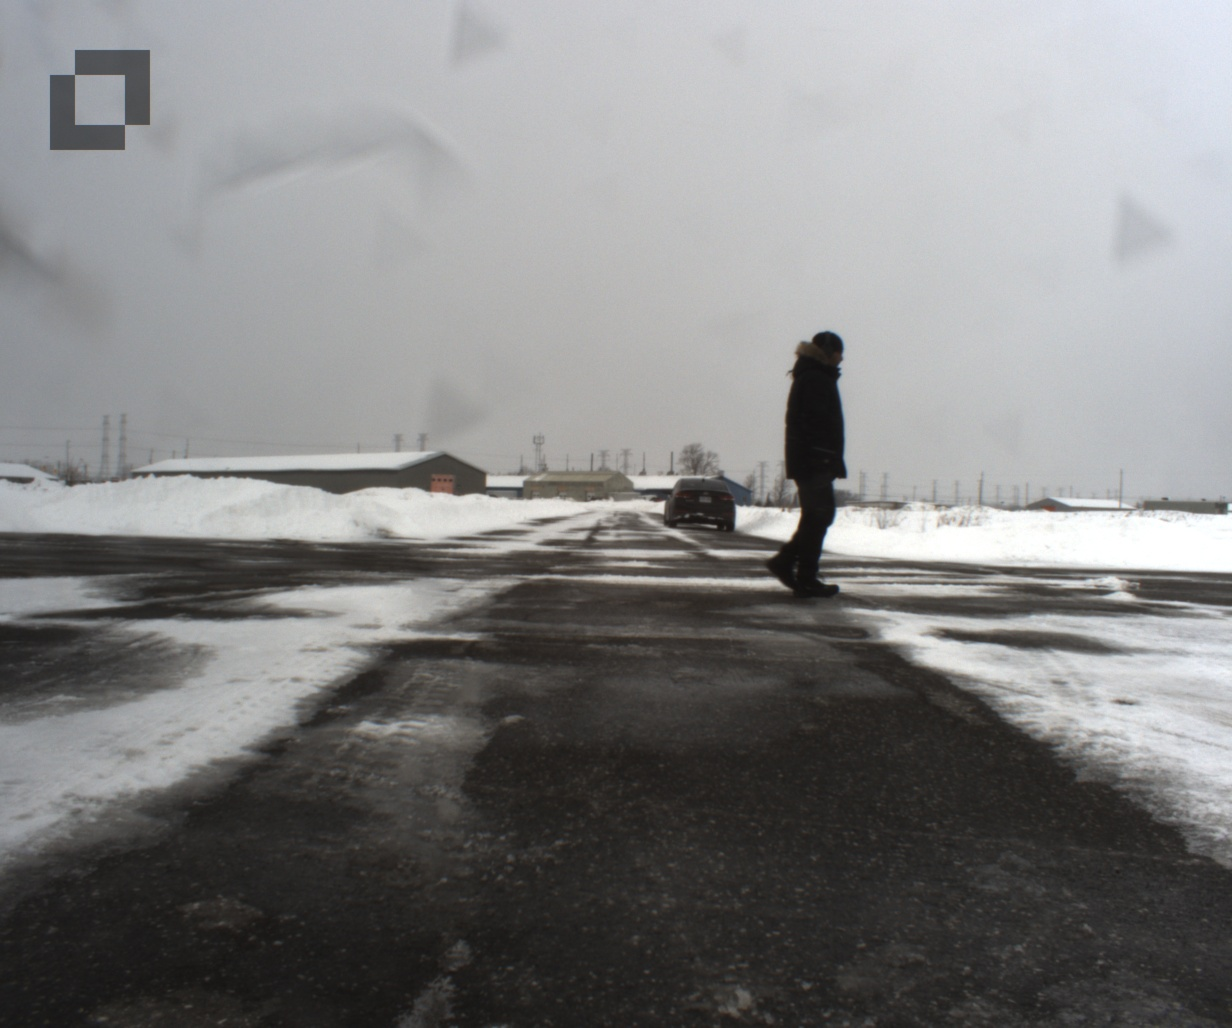

In [14]:
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = Image(img_path)
display(img)

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?


Raw Range-Doppler representation:


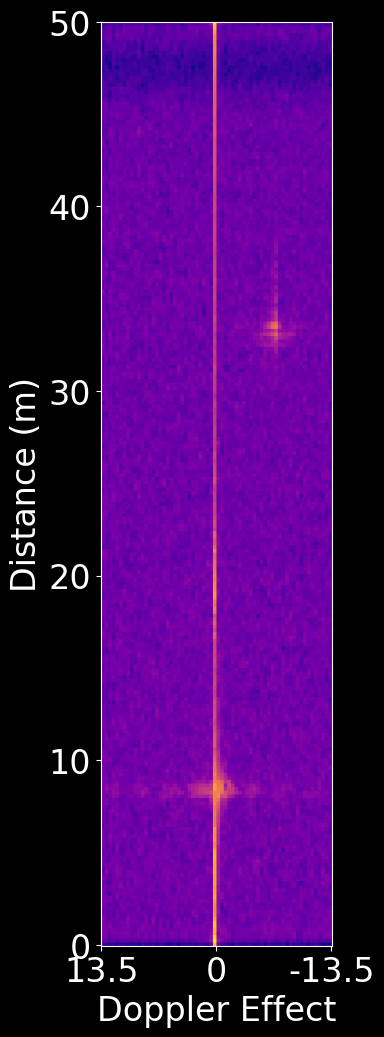

/tmp/ipykernel_55826/1529025922.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_55826/1529025922.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':


Range-Doppler with sparse annotations:


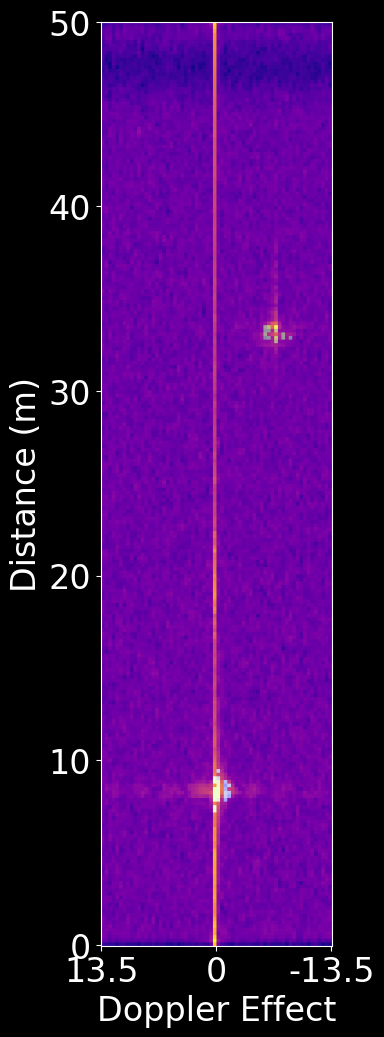

Range-Doppler with dense annotations:


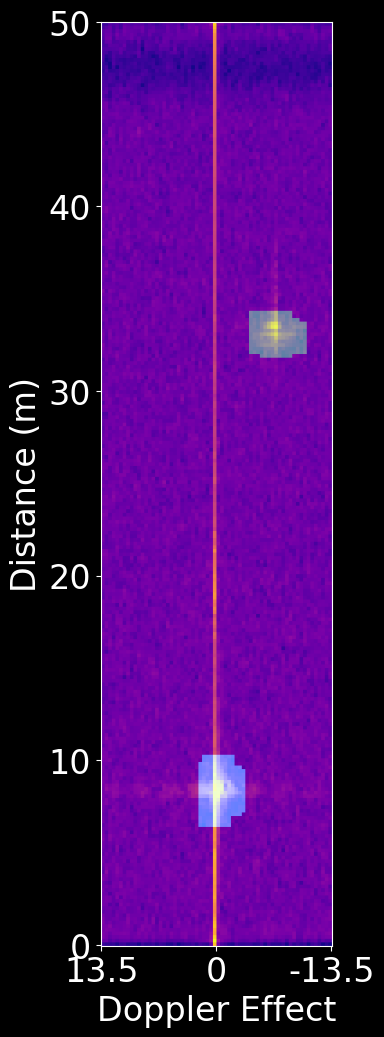

Range-Doppler with box annotations:


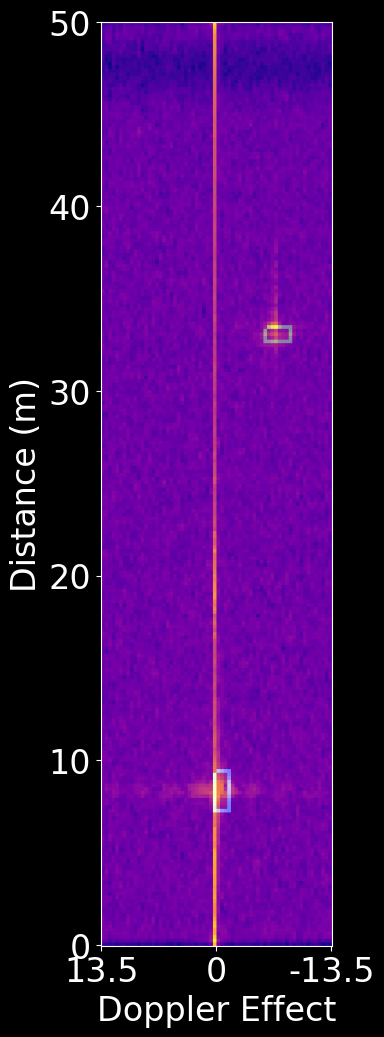

In [15]:
# Range-Doppler visualization
signal_visualizer = SignalVisualizer(rd_matrix)
print('Raw Range-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='range_doppler', color_scale=False,
                             rotation=True, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_doppler'][annotation_type]
        annot_generator = AnnotationGenerator(rd_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Doppler with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/rd_{}.png'.format(annotation_type),
                                                signal_type='range_doppler', color_scale=False,
                                                rotation=True, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?


Raw Range-Angle representation:


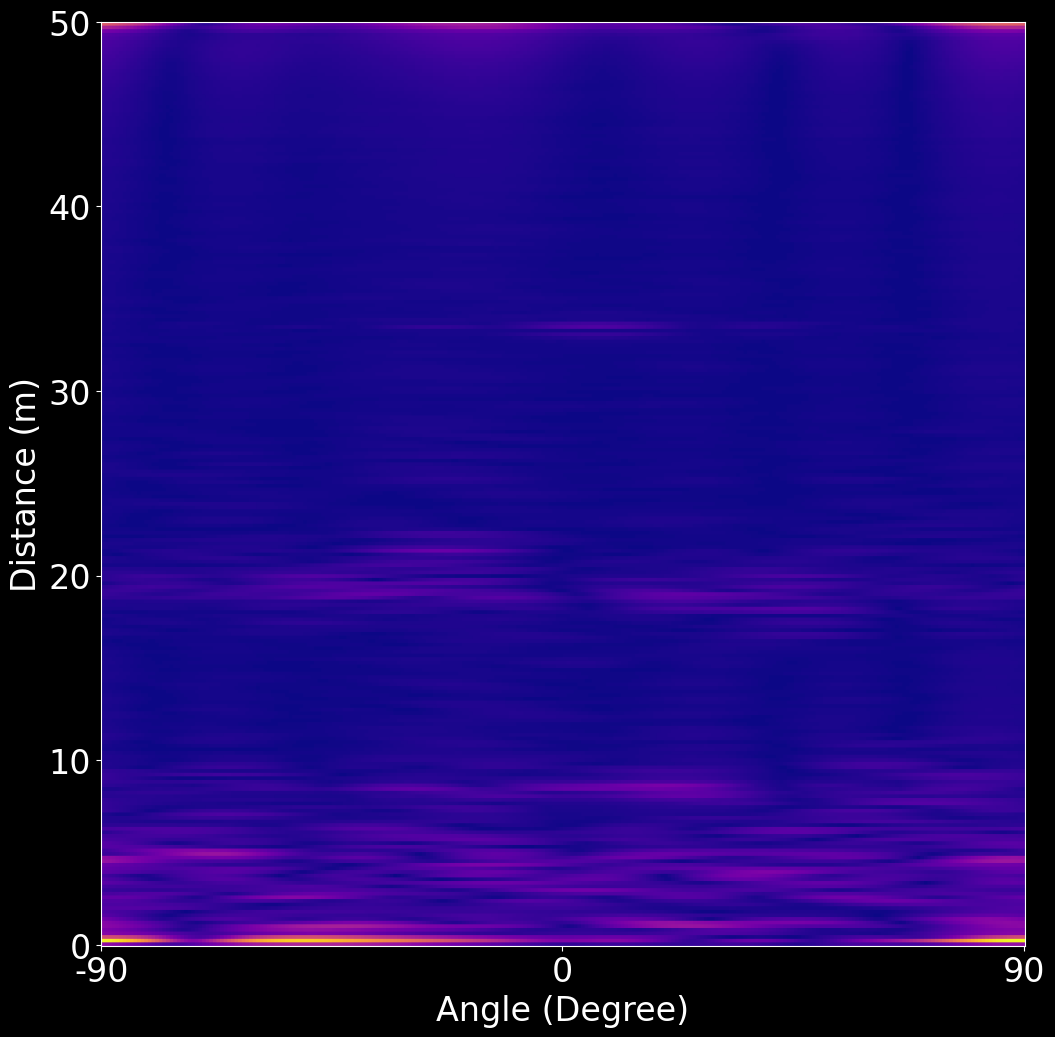

/tmp/ipykernel_55826/3271338884.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if annotation_type is 'sparse':
/tmp/ipykernel_55826/3271338884.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif annotation_type is 'dense':


Range-Angle with sparse annotations:


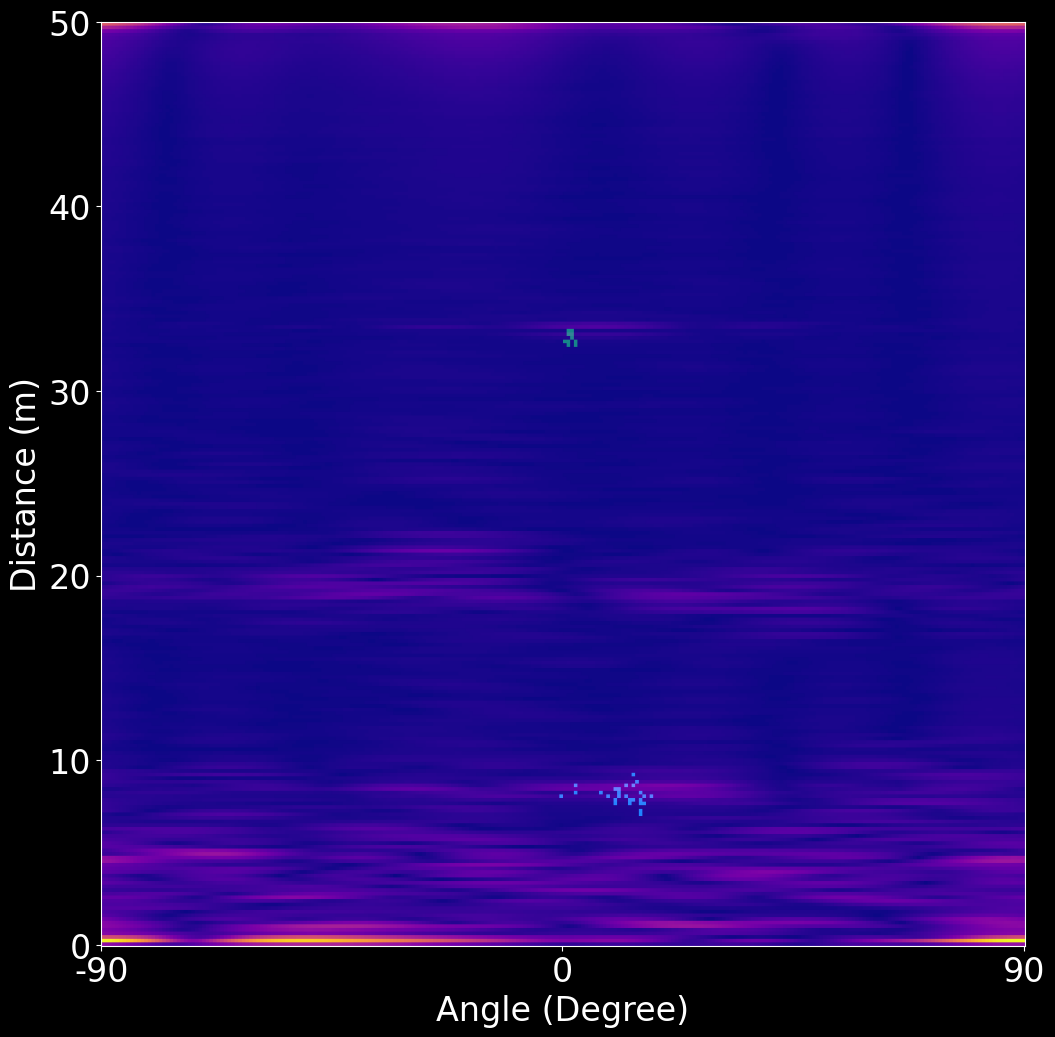

Range-Angle with dense annotations:


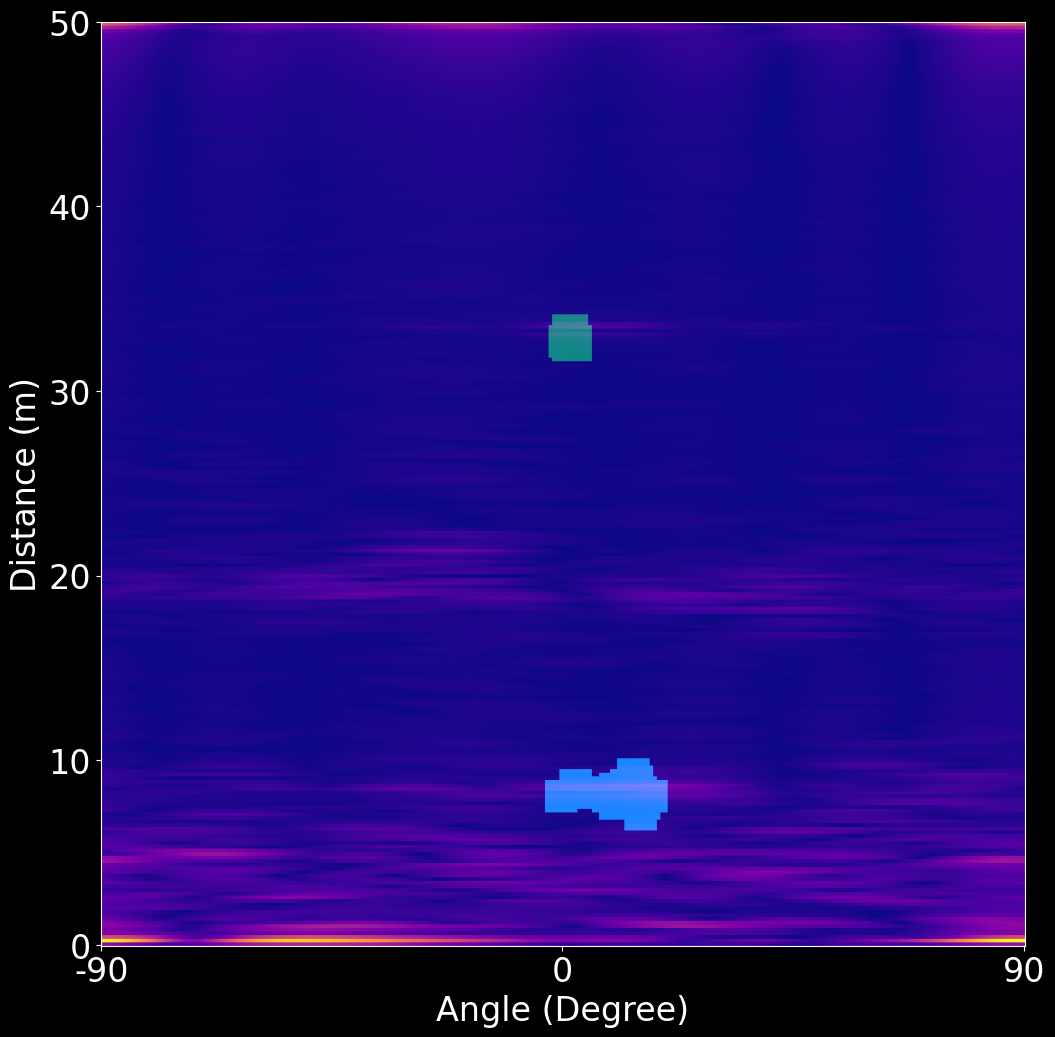

Range-Angle with box annotations:


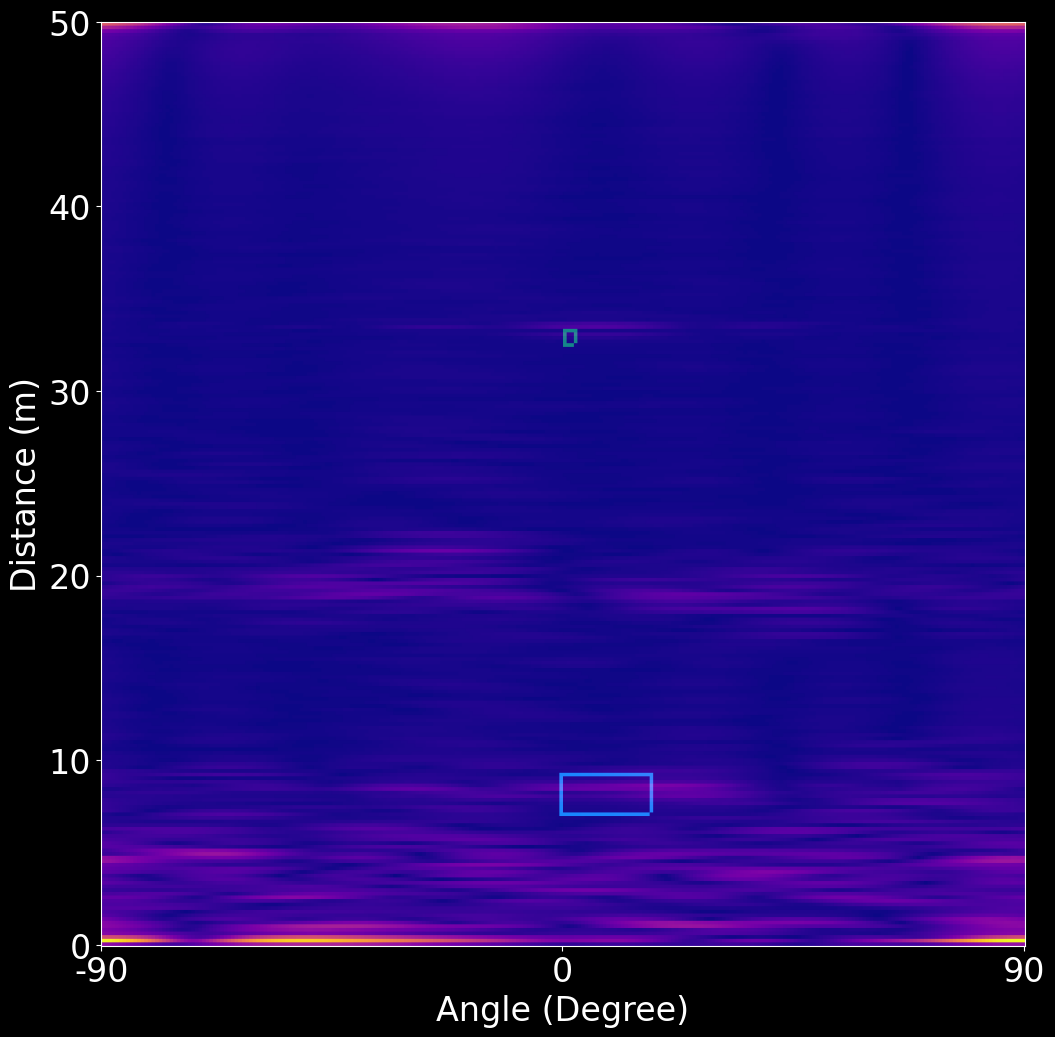

In [16]:
# Range-Angle visualization
signal_visualizer = SignalVisualizer(ra_matrix)
print('Raw Range-Angle representation:')
signal_visualizer.save_scale(path='.', signal_type='range_angle', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
for annotation_type in ['sparse', 'dense', 'box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_angle'][annotation_type]
        annot_generator = AnnotationGenerator(ra_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Angle with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                                signal_type='range_angle', color_scale=False,
                                                rotation=False, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()